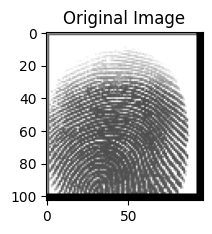

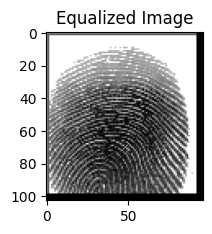

In [1]:
import cv2 
import matplotlib.pyplot as plt 
def read_image(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image
    
def equalization(image):
    equalized_img = cv2.equalizeHist(image)
    return equalized_img

def preprocessing_image(image_path):
    image=read_image(image_path)
    equalized_image=equalization(image)
    return image,equalized_image

def display_image(image,equalized_image):
    plt.subplot(2,1,1)
    plt.imshow(image,cmap='gray')
    plt.title("Original Image")
    plt.show()

    plt.subplot(2,1,2)
    plt.imshow(equalized_image,cmap="gray")
    plt.title("Equalized Image")
    plt.show()


image_path="dataset_blood_group/A-/cluster_1_1025.BMP"

image, equalized_image=preprocessing_image(image_path)
display_image(image,equalized_image)
    

In [1]:
from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import numpy as np
import os
import random

# Function to apply various augmentations
def augment_image(image):
    augmented_images = []

    # Define a few augmentation techniques
    augmentations = [
        lambda x: x.rotate(random.uniform(-30, 30)),
        lambda x: ImageEnhance.Contrast(x).enhance(random.uniform(0.5, 1.5)),
        lambda x: ImageEnhance.Brightness(x).enhance(random.uniform(0.5, 1.5)),
        lambda x: ImageOps.flip(x),
        lambda x: ImageOps.mirror(x),
        lambda x: x.crop((random.randint(0, 10), random.randint(0, 10), x.width - random.randint(0, 10), x.height - random.randint(0, 10))).resize((x.width, x.height))
    ]

    for i in range(15):
        augmented_image = image.copy()
        for aug in random.sample(augmentations, random.randint(1, len(augmentations))):
            augmented_image = aug(augmented_image)
        augmented_images.append(augmented_image)
    
    return augmented_images


def augment_directory(directory):
    blood_groups=os.listdir(directory)
    for blood_group in blood_groups:
        images=os.listdir(os.path.join(directory,blood_group))
        for image in images:
            # Load the original image
            img_name=image.split('.')[0]
            image_path=os.path.join(os.path.join(directory,blood_group),image)
            original_image = Image.open(image_path)
            augmented_images=augment_image(original_image)
            for i, img in enumerate(augmented_images):
                img.save(os.path.join(directory,blood_group,f'{img_name}_augmented_{i+1}.jpeg'))
                print("15 augmented images have been saved.")

augment_directory("new_prints")


15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
15 augmented images have been saved.
1

In [2]:
# no of images for each folder 
import os
blood_groups=os.listdir("dataset")

for blood_group in blood_groups:
    no=len(os.listdir(os.path.join("dataset",blood_group)))
    print("No of images for {} are {}".format(blood_group,no))

No of images for A+ are 776
No of images for A- are 863
No of images for AB+ are 500
No of images for AB- are 422
No of images for B+ are 930
No of images for B- are 504
No of images for O+ are 1359
No of images for O- are 475


In [3]:
import os 
from PIL import Image
import numpy as np 
import time 

start_time=time.time()
directory="Blood_data"

if not os.path.exists(directory):
    os.mkdir(directory)

source_dir="dataset"

blood_groups=os.listdir(source_dir)

for blood_group in blood_groups:
    blood_dir=os.path.join(source_dir,blood_group)
    dest_path=os.path.join(directory,blood_group)
    if not os.path.exists(dest_path):
        os.mkdir(dest_path)
        
    images=os.listdir(blood_dir)
    for img in images:
        image_path=os.path.join(blood_dir,img)
        image,equalized_image=preprocessing_image(image_path)
        dest_image_path=os.path.join(dest_path,img)
        if not os.path.isfile(dest_image_path): 
            image_pil=Image.fromarray(equalized_image)
            image_pil.save(dest_image_path)
    print(f"{blood_group} is completed")

end_time=time.time()

elapsed_time=end_time-start_time

print(f"Elapsed Time is {elapsed_time}")

A+ is completed
A- is completed
AB+ is completed
AB- is completed
B+ is completed
B- is completed
O+ is completed
O- is completed
Elapsed Time is 51.040194511413574


In [4]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Step 1: Load and preprocess the data
def load_images_from_folder(folder):
    images = []
    labels = []
    blood_groups=os.listdir(folder)
    for label, subfolder in enumerate(os.listdir(folder)):
        subfolder_path = os.path.join(folder, subfolder)
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Failed to read {img_path}")
                continue
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels), np.array(blood_groups)

# Load the images and labels
images, labels,blood_groups = load_images_from_folder('Blood_data')

# Normalize images
images = images / 255.0

# Reshape images for the network
images = images.reshape(-1, 32, 32, 1)

# Convert labels to one-hot encoding
unique=np.unique(blood_groups)
encoding={k:v for v,k in enumerate(unique)}

num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes)

# Print number of classes
# num_classes = len(unique)
print(f"Number of classes: {num_classes}")

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# # Print shapes for debugging
# print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
# print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Step 2: Define the LeNet architecture
def build_lenet(num_classes):
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        AveragePooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = build_lenet(num_classes)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Fit the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Number of classes: 8


C:\Users\P.Leela Venkatesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2532 - loss: 1.9655 - val_accuracy: 0.3208 - val_loss: 1.7922
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3876 - loss: 1.6070 - val_accuracy: 0.3919 - val_loss: 1.5035
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4318 - loss: 1.4429 - val_accuracy: 0.4331 - val_loss: 1.4191
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4579 - loss: 1.3651 - val_accuracy: 0.4640 - val_loss: 1.3238
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5154 - loss: 1.2405 - val_accuracy: 0.5189 - val_loss: 1.2185
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5516 - loss: 1.1250 - val_accuracy: 0.5480 - val_loss: 1.1568
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5865 - loss: 1.0507 - val_accuracy: 0.5892 - val_loss: 1.0792
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5981 - loss: 1.0052 - val_accuracy: 0.

In [6]:
def build_lenet(num_classes):
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        AveragePooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = build_lenet(num_classes)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Fit the model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2483 - loss: 1.9281 - val_accuracy: 0.3336 - val_loss: 1.6672
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3852 - loss: 1.5799 - val_accuracy: 0.4160 - val_loss: 1.4707
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4386 - loss: 1.4162 - val_accuracy: 0.4614 - val_loss: 1.3788
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5092 - loss: 1.2469 - val_accuracy: 0.5249 - val_loss: 1.2193
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5573 - loss: 1.1434 - val_accuracy: 0.5592 - val_loss: 1.1268
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5852 - loss: 1.0659 - val_accuracy: 0.5943 - val_loss: 1.0505
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5997 - loss: 1.0211 - val_accuracy: 0.6003 - val_loss: 1.0393
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6232 - loss: 0.9607 - val_accu

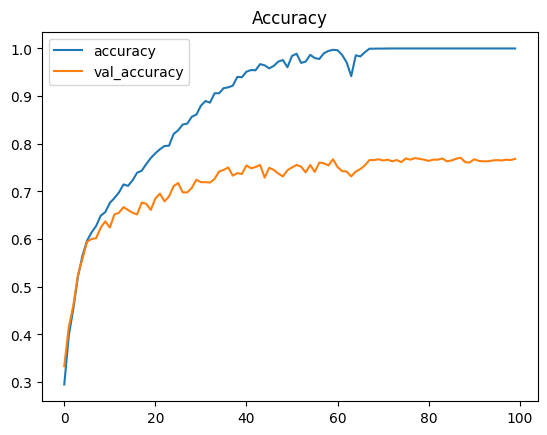

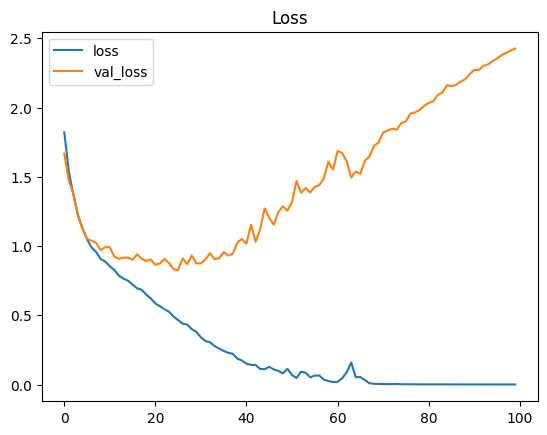

In [7]:
import pandas as pd
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [8]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

unique=np.unique(blood_groups)
encoding={v:k for v,k in enumerate(unique)}

# Load the pre-trained LeNet model
# model_path = 'lenet_model.h5'  # Path to your pre-trained model
# model = load_model(model_path)

# Function to preprocess the input image
# def preprocess_image(image_path):
#     # Load the image
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
#     # Resize the image to 32x32 pixels
#     image_resized = cv2.resize(image, (32, 32))
    
#     # Normalize the pixel values to the range [0, 1]
#     image_normalized = image_resized / 255.0
    
#     # Reshape the image to match the input shape of the model (1, 32, 32, 1)
#     image_reshaped = np.reshape(image_normalized, (1, 32, 32, 1))
    
#     return image_reshaped

# Function to make a prediction
def predict_image(model, image_path):
    # Preprocess the image
    image,equalized_image = preprocessing_image(image_path)
    # img = cv2.imread(equalized_image, cv2.IMREAD_GRAYSCALE)
    if equalized_image is None:
        print(f"Failed to read {image_path}")
        return None
    img = cv2.resize(equalized_image, (32, 32))
    image_normalized = img / 255.0
        
    # Reshape the image to match the input shape of the model (1, 32, 32, 1)
    image_reshaped = np.reshape(image_normalized, (1, 32, 32, 1))
    
    
    # Make a prediction
    predictions = model.predict(image_reshaped)
    
    # Get the class label with the highest probability
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_class=encoding[predicted_class]
    
    
    return predicted_class


# test_data directory 

def test_directory(directory):
    y_test=[]
    y_pred=[]

    blood_groups=os.listdir(directory)[:8]
    for blood_group in blood_groups:
        samples=os.listdir(os.path.join(directory,blood_group))
        for sample in samples:
            image_path=os.path.join(os.path.join(directory,blood_group),sample)
            pred=predict_image(model,image_path)
            print(f'Name: {sample}')
            print(f"Actual : {blood_group}")
            print(f"Predicted : {pred}")
            y_test.append(blood_group)
            y_pred.append(pred)

    return y_test,y_pred

y_test,y_pred=test_directory("Test_data")
print(classification_report(y_test,y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Name: cluster_0_5124.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Name: cluster_0_5140.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Name: cluster_0_5170.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Name: cluster_0_5178.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Name: cluster_0_5369.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Name: cluster_0_5383.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Name: cluster_0_5445.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Name: cluster_0_5461.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Name: cluster_0_5466.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Name: cluster_0_5740.BMP
Actual : A+
Predicted : O+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Name: cluster_0_5812.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━

In [8]:
import os
lst=os.listdir("Blood_data")
encoding={}

for idx,blood_type in enumerate(lst):
    encoding[idx]=blood_type

print(lst)

['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [9]:
print(f'{np.round(accuracy_score(y_test,y_pred)*100,2)}% of accuracy')

88.89% of accuracy


In [10]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[15  0  0  0  0  0  1  1]
 [ 0 19  1  1  0  0  0  0]
 [ 3  0 13  0  0  0  0  0]
 [ 0  0  0 11  1  0  0  0]
 [ 0  1  1  0 21  1  0  0]
 [ 0  0  0  1  1 22  0  0]
 [ 1  2  0  0  0  0 21  0]
 [ 0  0  0  0  0  0  2 22]]


In [9]:
y_test,y_pred=test_directory("Final_test_data")
print(f'{np.round(accuracy_score(y_test,y_pred)*100,2)}% of accuracy')
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Name: cluster_0_3134.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Name: cluster_0_3136.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Name: cluster_0_3152.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Name: cluster_0_3163.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Name: cluster_0_3179.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Name: cluster_0_3187.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Name: cluster_0_3189.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Name: cluster_0_3198.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Name: cluster_0_3199.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Name: cluster_0_3207.BMP
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Name: cluster_0_3209.BMP
Actual : A+
Predicted : O-
1/1 ━━━━━━━

In [10]:
#classification report 
# print(unique)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          A+       0.81      0.71      0.76        24
          A-       0.76      0.92      0.83        24
         AB+       0.79      0.92      0.85        24
         AB-       0.79      0.79      0.79        24
          B+       0.90      0.75      0.82        24
          B-       0.83      0.83      0.83        24
          O+       0.69      0.83      0.75        24
          O-       0.76      0.54      0.63        24

    accuracy                           0.79       192
   macro avg       0.79      0.79      0.78       192
weighted avg       0.79      0.79      0.78       192



In [11]:
image_path="Malli_right_thumb.jpeg"
predict_image(model,image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


'O+'

In [12]:
image_path="right_thumb.jpg"
predict_image(model,image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'O+'

In [13]:
image_path="O-.BMP"
predict_image(model,image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


'O-'

In [14]:
image_path="A-.BMP"
predict_image(model,image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'A-'

In [15]:
image_path="A+.BMP"
predict_image(model,image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


'A+'

In [16]:
image_path="B-.BMP"
predict_image(model,image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'B-'

In [17]:
image_path="B+.BMP"
predict_image(model,image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'B+'

In [18]:
image_path="AB+.BMP"
predict_image(model,image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'AB+'

In [19]:
image_path="AB-.BMP"
predict_image(model,image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'AB-'

In [20]:
# frnds samples

y_test,y_pred=test_directory("prints")
print(classification_report(y_test,y_pred))

print(f'{np.round(accuracy_score(y_test,y_pred)*100,2)}% of accuracy')
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Name: aravind.jpg
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Name: a_vijay.jpg
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Name: devi.jpg
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Name: hemalatha.jpg
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Name: jhyotsna.jpg
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Name: k_naga_ganesh.jpg
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Name: k_prasanna.jpg
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Name: leela.jpg
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Name: madhan.jpg
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Name: madhavi.jpg
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Name: mouni_m.jpg
Actual : A+
Predicted : A+
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Name: pavan.jpg
Actual : A+
Predicted : A+
1/

In [29]:
# alexnet

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import os

# Define the AlexNet model
def create_alexnet_model(input_shape):
    model = Sequential()
    model.add(Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for classification
    return model

# Create the AlexNet model
input_shape = (224, 224, 3)
model = create_alexnet_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Function to preprocess the input image
def preprocess_image_alexnet(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Function to load data and preprocess
def load_data(data_dir):
    images = []
    labels = []
    class_names = os.listdir(data_dir)
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file_name)
                image = preprocess_image_alexnet(file_path)
                images.append(image)
                labels.append(label)
    images = np.vstack(images)
    labels = np.array(labels)
    labels = tf.keras.utils.to_categorical(labels, num_classes=10)
    return images, labels

# Load and preprocess the data
data_dir = 'dataset_blood_group'  # Replace with your actual data directory
images, labels = load_data(data_dir)

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train the model
model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, batch_size=32)

# Save the model
# model.save('alexnet_model.h5')



C:\Users\P.Leela Venkatesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.1906 - loss: 2.4208 - val_accuracy: 0.2093 - val_loss: 2.0571
Epoch 2/10
 24/103 ━━━━━━━━━━━━━━━━━━━━ 1:40 1s/step - accuracy: 0.1697 - loss: 2.0842

KeyboardInterrupt: 

In [36]:
# Function to make a prediction
def predict_image(model, image_path):
    image = preprocess_image_alexnet(image_path)
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_class=encoding[predicted_class]
    return predicted_class

def test_directory(directory):
    y_test=[]
    y_pred=[]

    blood_groups=os.listdir(directory)
    for blood_group in blood_groups:
        samples=os.listdir(os.path.join(directory,blood_group))
        for sample in samples:
            image_path=os.path.join(os.path.join(directory,blood_group),sample)
            pred=predict_image(model,image_path)
            y_test.append(blood_group)
            y_pred.append(pred)

    return y_test,y_pred

y_test,y_pred=test_directory("Test_data")
print(classification_report(y_test,y_pred))

print(f'{np.round(accuracy_score(y_test,y_pred)*100,2)}% of accuracy')

print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

In [ ]:
y_test,y_pred=test_directory("frnds_samples")
print(classification_report(y_test,y_pred))

print(f'{np.round(accuracy_score(y_test,y_pred)*100,2)}% of accuracy')

print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

In [39]:
model.save("alexnet.h5")

In [1]:
#VGG16

import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout


# Function to preprocess the input image
def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255.0
    return image

# Function to load data and preprocess
def load_data(data_dir, target_size=(224, 224)):
    images = []
    labels = []
    class_names = os.listdir(data_dir)
    class_names.sort()  # Ensure consistent order of classes
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file_name)
                image = preprocess_image(file_path, target_size)
                images.append(image)
                labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=len(class_names))
    return images, labels

# Load and preprocess the data
data_dir = 'Blood_data'  # Replace with your actual data directory
images, labels = load_data(data_dir)


In [ ]:

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load the VGG16 model with pre-trained ImageNet weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(os.listdir(data_dir)), activation='softmax')(x)

# Create the final model
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (fine-tuning)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg16.summary()

# Train the model
history = model_vgg16.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, batch_size=32)

# Save the trained model
model_vgg16.save('vgg16_finetuned_model.h5')





Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,693,640 (105.64 MB)

 Trainable params: 12,978,952 (49.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 565s 5s/step - accuracy: 0.2780 - loss: 2.8430 - val_accuracy: 0.7390 - val_loss: 0.8906
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 515s 5s/step - accuracy: 0.5709 - loss: 1.1668 - val_accuracy: 0.7471 - val_loss: 0.7435
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 510s 5s/step - accuracy: 0.6222 - loss: 1.0116 - val_accuracy: 0.7854 - val_loss: 0.6869
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 511s 5s/step - accuracy: 0.6434 - loss: 0.9551 - val_accuracy: 0.8005 - val_loss: 0.5720
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 489s 5s/step - accuracy: 0.6832 - loss: 0.8558 - val_accuracy: 0.8318 - val_loss: 0.5176
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 0.6695 - loss: 0.8226 - val_accuracy: 0.7993 - val_loss: 0.5574
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 455s 4s/step - accuracy: 0.6767 - loss: 0.7901 - val_accuracy: 0.8202 - val_loss: 0.5171
Epoch 8/10
 59/108 ━━━━━━━━━━━━━━━━━━━━ 2:52 4s/step - accuracy: 0.7041 - loss: 0.7130

In [ ]:
# Function to make a prediction
def predict_image(model, image_path):
    image = preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_class=encoding[predicted_class]
    return predicted_class


def test_directory(directory):
    y_test=[]
    y_pred=[]

    blood_groups=os.listdir(directory)
    for blood_group in blood_groups:
        samples=os.listdir(os.path.join(directory,blood_group))
        for sample in samples:
            image_path=os.path.join(os.path.join(directory,blood_group),sample)
            pred=predict_image(model_vgg16,image_path)
            y_test.append(blood_group)
            y_pred.append(pred)

    return y_test,y_pred

y_test,y_pred=test_directory("Test_data")
print(classification_report(y_test,y_pred))

print(f'{np.round(accuracy_score(y_test,y_pred)*100,2)}% of accuracy')

print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))




In [ ]:
def test_directory(directory):
    y_test=[]
    y_pred=[]

    blood_groups=os.listdir(directory)
    for blood_group in blood_groups:
        samples=os.listdir(os.path.join(directory,blood_group))
        for sample in samples:
            image_path=os.path.join(os.path.join(directory,blood_group),sample)
            pred=predict_image(model_vgg16,image_path)
            y_test.append(blood_group)
            y_pred.append(pred)

    return y_test,y_pred

y_test,y_pred=test_directory("Final_test_data")
print(classification_report(y_test,y_pred))

print(f'{np.round(accuracy_score(y_test,y_pred)*100,2)}% of accuracy')

print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

In [14]:
# ResNet 50 

# with dataset_blood_group
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Function to preprocess the input image
def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255.0
    return image

# Function to load data and preprocess
def load_data(data_dir, target_size=(224, 224)):
    images = []
    labels = []
    class_names = os.listdir(data_dir)
    class_names.sort()  # Ensure consistent order of classes
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file_name)
                image = preprocess_image(file_path, target_size)
                images.append(image)
                labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=len(class_names))
    return images, labels

# Load and preprocess the data
data_dir = 'dataset_blood_group'  # Replace with your actual data directory
images, labels = load_data(data_dir)

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


In [15]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

# Load the ResNet50 model with pre-trained ImageNet weights, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(os.listdir(data_dir)), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (fine-tuning)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
# Train the model
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=4, batch_size=32)

# Save the trained model
model.save('resnet50_finetuned_model.h5')


Epoch 1/4
108/108 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.1759 - loss: 2.2248 - val_accuracy: 0.2262 - val_loss: 1.9585
Epoch 2/4
108/108 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.2099 - loss: 1.9895 - val_accuracy: 0.2425 - val_loss: 1.8993
Epoch 3/4
108/108 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.2360 - loss: 1.8931 - val_accuracy: 0.2784 - val_loss: 1.8027
Epoch 4/4
108/108 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.2995 - loss: 1.8119 - val_accuracy: 0.4060 - val_loss: 1.7363


In [17]:
blood_groups=os.listdir("Blood_data")
unique=np.unique(blood_groups)
encoding={v:k for v,k in enumerate(unique)}

In [18]:
# Function to make a prediction
def predict_image(model, image_path):
    image = preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_class=encoding[predicted_class]
    return predicted_class



In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def test_directory(directory):
    y_test=[]
    y_pred=[]

    blood_groups=os.listdir(directory)
    for blood_group in blood_groups:
        samples=os.listdir(os.path.join(directory,blood_group))
        for sample in samples:
            image_path=os.path.join(os.path.join(directory,blood_group),sample)
            pred=predict_image(model,image_path)
            y_test.append(blood_group)
            y_pred.append(pred)

    return y_test,y_pred

y_test,y_pred=test_directory("Final_test_data")
print(classification_report(y_test,y_pred))

print(f'{np.round(accuracy_score(y_test,y_pred)*100,2)}% of accuracy')

print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1